Name: Sathish Kumar Rajendiran
Chapter :  Discourse and Dialogue
Date: 11/14/2020
Week: 7

In [1]:
#import libraries

# standard library
import os
import sys
from datetime import datetime
import time

# csv, xls, pandas & json
import pandas as pd
import json
import csv
import xlrd

# Language Processing
import nltk
from nltk import FreqDist
# import wordnet and shorten its name to wn
from nltk.corpus import wordnet as wn

# web requests
from urllib import request


##  Regular Expression to match non-alphabetic characters
import re

os.getcwd()

'/Users/sathishrajendiran/ist664-nlp'

In [2]:
# define a feature extraction function for each name
def gender_features(word):
    return{'last_letter': word[-1]}

print(gender_features('Shrek'))


{'last_letter': 'k'}


In [3]:
# resource for male and female first names
from nltk.corpus import names
print(names.words('male.txt')[:20])

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim', 'Abdullah', 'Abe', 'Abel', 'Abelard', 'Abner', 'Abraham', 'Abram', 'Ace', 'Adair', 'Adam']


In [4]:
print(names.words('female.txt')[:20])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale', 'Abra', 'Acacia', 'Ada', 'Adah', 'Adaline', 'Adara', 'Addie', 'Addis', 'Adel', 'Adela']


In [5]:
# make list of male and female names paired with gender
namesgender = ([(name, 'male') for name in names.words('male.txt')] +
          [(name, 'female') for name in names.words('female.txt')])
print(len(namesgender))

7944


In [6]:
print(namesgender[:20])

[('Aamir', 'male'), ('Aaron', 'male'), ('Abbey', 'male'), ('Abbie', 'male'), ('Abbot', 'male'), ('Abbott', 'male'), ('Abby', 'male'), ('Abdel', 'male'), ('Abdul', 'male'), ('Abdulkarim', 'male'), ('Abdullah', 'male'), ('Abe', 'male'), ('Abel', 'male'), ('Abelard', 'male'), ('Abner', 'male'), ('Abraham', 'male'), ('Abram', 'male'), ('Ace', 'male'), ('Adair', 'male'), ('Adam', 'male')]


In [7]:
print(namesgender[7924:])

[('Zena', 'female'), ('Zenia', 'female'), ('Zia', 'female'), ('Zilvia', 'female'), ('Zita', 'female'), ('Zitella', 'female'), ('Zoe', 'female'), ('Zola', 'female'), ('Zonda', 'female'), ('Zondra', 'female'), ('Zonnya', 'female'), ('Zora', 'female'), ('Zorah', 'female'), ('Zorana', 'female'), ('Zorina', 'female'), ('Zorine', 'female'), ('Zsa Zsa', 'female'), ('Zsazsa', 'female'), ('Zulema', 'female'), ('Zuzana', 'female')]


In [8]:
# put the list into random order
import random
random.shuffle(namesgender)
print(namesgender[:20])

[('Cherice', 'female'), ('Hope', 'female'), ('Kory', 'male'), ('Ashish', 'male'), ('Petr', 'male'), ('Luce', 'male'), ('Cleveland', 'male'), ('Raymond', 'male'), ('Kai', 'female'), ('Lion', 'male'), ('Hollyanne', 'female'), ('Edouard', 'male'), ('Ash', 'male'), ('Zena', 'female'), ('Olaf', 'male'), ('Neale', 'male'), ('Marcelline', 'female'), ('Steffi', 'female'), ('Dario', 'male'), ('Casie', 'female')]


In [9]:
# separate the names into training and test
train_names = namesgender[500:]
test_names = namesgender[:500]

In [10]:
# use our features to train a classify and test on the development test set
train_set = [(gender_features(n), g) for (n, g) in train_names]
test_set = [(gender_features(n), g) for (n, g) in test_names]
print(train_set[:20])

[({'last_letter': 'a'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'i'}, 'male'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 's'}, 'male'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'l'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'r'}, 'male'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'e'}, 'female'), ({'last_letter': 'y'}, 'female'), ({'last_letter': 'n'}, 'male'), ({'last_letter': 'y'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'a'}, 'female'), ({'last_letter': 'r'}, 'male')]


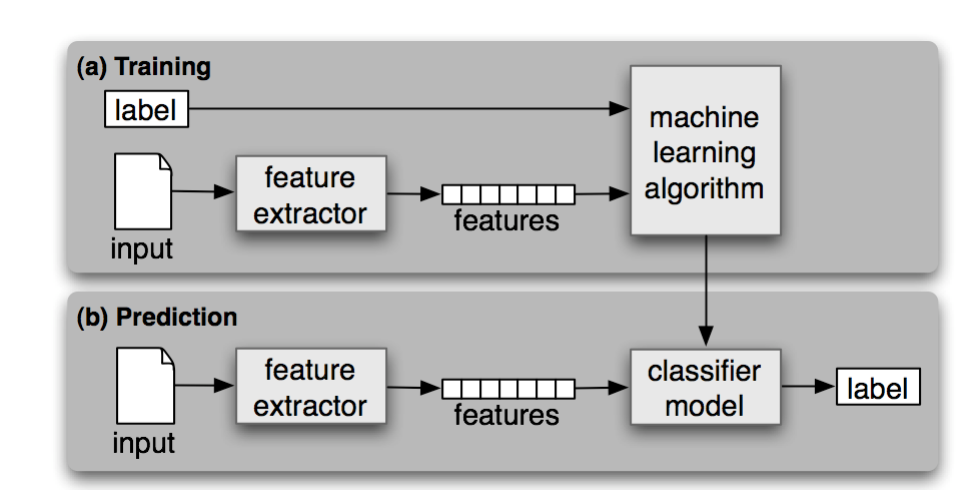

In [11]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [12]:
# classify new instances
print(classifier.classify(gender_features('Neo')))
print(classifier.classify(gender_features('Trinity')))

male
female


We can the compute the accuracy of the classifier on the test set.  
The accuracy function for each classifier:
* first removes the gender labels from the test set,
* runs the classifier on each name in the test set to get a predicted gender, and 
* compares the predicted gender with each actual gender from the test set to get the evaluation score.  

In this case, it just produces an accuracy score, instead of precision and recall.

In [13]:
# classify accuracy function runs the classifier on the test set and reports
#   comparisons between predicted labels and actual/gold labels
print(nltk.classify.accuracy(classifier, test_set))

0.722


In [14]:
# this function available for naive bayes classifiers
print(classifier.show_most_informative_features(20))

Most Informative Features
             last_letter = 'a'            female : male   =     41.6 : 1.0
             last_letter = 'k'              male : female =     32.8 : 1.0
             last_letter = 'p'              male : female =     19.9 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'v'              male : female =     10.6 : 1.0
             last_letter = 'd'              male : female =     10.3 : 1.0
             last_letter = 'o'              male : female =      8.6 : 1.0
             last_letter = 'm'              male : female =      8.5 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0
             last_letter = 'g'              male : female =      5.5 : 1.0
             last_letter = 'w'              male : female =      5.4 : 1.0
             last_letter = 'z'              male : female =      4.3 : 1.0
             last_letter = 't'              male : female =      4.2 : 1.0

In [15]:
# define a function that will compare the classifier labels with the gold standard labels
def geterrors(test):
    errors = []
    for (name, tag) in test:
        guess = classifier.classify(gender_features(name))
        if guess != tag:
            errors.append( (tag, guess, name) )
    return errors

In [16]:
errors = geterrors(test_names)
print(len(errors))

139


In [17]:
# define a function to print the errors
def printerrors(errors):
    for (tag, guess, name) in sorted(errors):
        print('correct={:<8s} guess={:<8s} name={:<30s}'.format(tag, guess, name))

printerrors(errors)

correct=female   guess=male     name=Ag                            
correct=female   guess=male     name=Allis                         
correct=female   guess=male     name=Annabel                       
correct=female   guess=male     name=Astrix                        
correct=female   guess=male     name=Babs                          
correct=female   guess=male     name=Brandais                      
correct=female   guess=male     name=Brear                         
correct=female   guess=male     name=Bren                          
correct=female   guess=male     name=Brenn                         
correct=female   guess=male     name=Caril                         
correct=female   guess=male     name=Carol                         
correct=female   guess=male     name=Charmian                      
correct=female   guess=male     name=Chrystal                      
correct=female   guess=male     name=Coral                         
correct=female   guess=male     name=Debor      

In [18]:
## classify part of speech based on sentence context
from nltk.corpus import brown

In [19]:
# define features for the "i"th word in the sentence, including three types of suffix 
#     and one pre-word
# the pos features function takes the sentence of untagged words and the index of a word i
#   it creates features for word i, including the previous word i-1
def pos_features(sentence, i):    
    features = {"suffix(1)": sentence[i][-1:],
                 "suffix(2)": sentence[i][-2:],
                 "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
    return features 


In [20]:
# look at features of a specific word in a specific sentence
# first sentence of brown corpus
sentence0 = brown.sents()[0]
print(sentence0)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


In [21]:
# word 8 of sentence 0
print(sentence0[8])

investigation


In [22]:
# pos features of the word 8 
print(pos_features(sentence0, 8))

{'suffix(1)': 'n', 'suffix(2)': 'on', 'suffix(3)': 'ion', 'prev-word': 'an'}


In [23]:
# get the POS tagged sentences with categories of news
tagged_sents = brown.tagged_sents(categories='news')
tag_sent0 = tagged_sents[0]
tag_sent0

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [24]:
# the function nltk.tag.untag will take the tags off
nltk.tag.untag(tag_sent0)

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

In [25]:
# the python enumerate function generates an index number for each item in a list
for i,(word,tag) in enumerate(tag_sent0):
    print (i, word, tag)

0 The AT
1 Fulton NP-TL
2 County NN-TL
3 Grand JJ-TL
4 Jury NN-TL
5 said VBD
6 Friday NR
7 an AT
8 investigation NN
9 of IN
10 Atlanta's NP$
11 recent JJ
12 primary NN
13 election NN
14 produced VBD
15 `` ``
16 no AT
17 evidence NN
18 '' ''
19 that CS
20 any DTI
21 irregularities NNS
22 took VBD
23 place NN
24 . .


In [26]:
# get feature sets of words appearing in the corpus, from untagged sentences.
# and then get their tags from corresponding tagged sentence
# use the Python function enumerate to pair the index numbers with sentence words 
#   for the pos features function
featuresets = []
for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
        featuresets.append( (pos_features(untagged_sent, i), tag) )

In [27]:
# look at the feature sets of the first 10 words
for f in featuresets[:10]:
    print (f)

({'suffix(1)': 'e', 'suffix(2)': 'he', 'suffix(3)': 'The', 'prev-word': '<START>'}, 'AT')
({'suffix(1)': 'n', 'suffix(2)': 'on', 'suffix(3)': 'ton', 'prev-word': 'The'}, 'NP-TL')
({'suffix(1)': 'y', 'suffix(2)': 'ty', 'suffix(3)': 'nty', 'prev-word': 'Fulton'}, 'NN-TL')
({'suffix(1)': 'd', 'suffix(2)': 'nd', 'suffix(3)': 'and', 'prev-word': 'County'}, 'JJ-TL')
({'suffix(1)': 'y', 'suffix(2)': 'ry', 'suffix(3)': 'ury', 'prev-word': 'Grand'}, 'NN-TL')
({'suffix(1)': 'd', 'suffix(2)': 'id', 'suffix(3)': 'aid', 'prev-word': 'Jury'}, 'VBD')
({'suffix(1)': 'y', 'suffix(2)': 'ay', 'suffix(3)': 'day', 'prev-word': 'said'}, 'NR')
({'suffix(1)': 'n', 'suffix(2)': 'an', 'suffix(3)': 'an', 'prev-word': 'Friday'}, 'AT')
({'suffix(1)': 'n', 'suffix(2)': 'on', 'suffix(3)': 'ion', 'prev-word': 'an'}, 'NN')
({'suffix(1)': 'f', 'suffix(2)': 'of', 'suffix(3)': 'of', 'prev-word': 'investigation'}, 'IN')


In [28]:
# using naive Bayesian as classifier
# split data into a training set and a test set, using a 90%/10% split
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
print(len(train_set))
print(len(test_set))

90499
10055


In [29]:
# train classifier on the training set
classifier = nltk.NaiveBayesClassifier.train(train_set)

# evaluate the accuracy (this will take a little while)
print(nltk.classify.accuracy(classifier, test_set))
# the result is reasonable for features without the previous tag


0.7891596220785678


In [30]:
### classify documents based on keywords
from nltk.corpus import movie_reviews
import random

# movie reviews are labeled either positive or negative (by human annotators)
print(movie_reviews.categories())

['neg', 'pos']


In [31]:
# for each document in movie_reviews, get its words and category (positive/negative)
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
print(len(documents))


2000


In [32]:
random.shuffle(documents)
# look at the first document - consists of a list of all the words in the review
# followed by the category
print(documents[0])

(['seen', 'september', '5', ',', '1998', 'at', '10', 'p', '.', 'm', '.', 'at', 'the', 'sony', 'nickelodeon', 'theaters', '(', 'boston', ',', 'ma', ')', ',', 'theater', '#', '2', ',', 'with', 'matt', 'perreault', 'for', 'free', 'using', 'my', 'sony', '/', 'loews', 'critic', "'", 's', 'pass', '.', '[', 'theater', 'rating', ':', '*', '*', '1', '/', '2', ':', 'okay', 'seats', ',', 'sound', ',', 'and', 'picture', ']', 'modern', 'society', 'is', 'now', 'inundated', 'with', 'more', 'sex', 'and', 'sexuality', 'than', 'it', 'ever', 'has', 'been', 'before', ',', 'from', 'teenage', 'sitcoms', 'to', 'nc', '-', '17', '-', 'rated', 'films', 'about', 'fetishes', '.', 'the', 'biggest', 'debate', 'of', 'the', 'subject', 'is', 'whether', 'or', 'not', 'it', 'affects', 'reality', 'or', 'just', 'reflects', 'it', '.', '"', 'your', 'friends', 'and', 'neighbors', '"', 'takes', 'a', 'different', 'approach', 'as', 'it', "'", 's', 'a', 'film', 'that', 'revolves', 'almost', 'entirely', 'around', 'sex', 'and', 'ho

In [33]:
## use words from all documents to define the word vector for features
# get all words from all movie_reviews and put into a frequency distribution
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
print(len(all_words))

39768


In [34]:
# get the 2000 most frequently appearing keywords in the corpus
word_items = all_words.most_common(20000)
word_features = [word for (word, freq) in word_items]   # just the words

# look at the first 100 words
print(word_features[:100])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [35]:
# define features (keywords) of a document
# each feature is 'contains(keyword)' and is true or false depending
# on whether that keyword is in the document
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['V_%s' % word] = (word in document_words)
    return features

# get features sets for a document, including keyword features and category feature
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

# the feature sets are 2000 words long - so this is optional
print(featuresets[0])

({'V_,': True, 'V_the': True, 'V_.': True, 'V_a': True, 'V_and': True, 'V_of': True, 'V_to': True, "V_'": True, 'V_is': True, 'V_in': True, 'V_s': True, 'V_"': True, 'V_it': True, 'V_that': True, 'V_-': True, 'V_)': True, 'V_(': True, 'V_as': True, 'V_with': True, 'V_for': True, 'V_his': True, 'V_this': True, 'V_film': True, 'V_i': True, 'V_he': True, 'V_but': True, 'V_on': True, 'V_are': True, 'V_t': True, 'V_by': True, 'V_be': True, 'V_one': True, 'V_movie': True, 'V_an': True, 'V_who': True, 'V_not': True, 'V_you': False, 'V_from': True, 'V_at': True, 'V_was': False, 'V_have': True, 'V_they': True, 'V_has': True, 'V_her': True, 'V_all': True, 'V_?': True, 'V_there': True, 'V_like': True, 'V_so': True, 'V_out': True, 'V_about': True, 'V_up': True, 'V_more': True, 'V_what': True, 'V_when': False, 'V_which': True, 'V_or': True, 'V_she': True, 'V_their': True, 'V_:': True, 'V_some': True, 'V_just': True, 'V_can': True, 'V_if': True, 'V_we': True, 'V_him': True, 'V_into': True, 'V_even':

In [36]:
# training using naive Baysian classifier with a 95/5 split
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

# evaluate the accuracy of the classifier
print (nltk.classify.accuracy(classifier, test_set))
# the accuracy result may vary since we randomized the documents


0.85


In [37]:
# show which features of classifier are most informative
print(classifier.show_most_informative_features(30))

Most Informative Features
                V_avoids = True              pos : neg    =     12.9 : 1.0
             V_stupidity = True              neg : pos    =     12.7 : 1.0
            V_astounding = True              pos : neg    =     12.2 : 1.0
             V_ludicrous = True              neg : pos    =     11.1 : 1.0
                  V_slip = True              pos : neg    =     10.9 : 1.0
           V_outstanding = True              pos : neg    =     10.7 : 1.0
             V_insulting = True              neg : pos    =     10.7 : 1.0
               V_insipid = True              neg : pos    =     10.4 : 1.0
                V_hudson = True              neg : pos    =     10.4 : 1.0
                  V_3000 = True              neg : pos    =     10.4 : 1.0
                 V_sucks = True              neg : pos    =     10.3 : 1.0
              V_seamless = True              pos : neg    =     10.2 : 1.0
                V_symbol = True              pos : neg    =     10.2 : 1.0